In [15]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [17]:
data = pd.read_excel('C:/Users/Aravind/Work/PROJECTS/Milky-way-of-Deep-Learning/Milky-way-of-Deep-Learning/data/external/full_dataset.xlsx')

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3275 entries, 0 to 3274
Columns: 1061 entries, Diet to col1060
dtypes: float64(1060), object(1)
memory usage: 26.5+ MB


In [19]:
data.describe()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,...,col1051,col1052,col1053,col1054,col1055,col1056,col1057,col1058,col1059,col1060
count,3275.000000,3275.000000,3275.000000,3275.000000,3275.000000,3275.000000,3275.000000,3275.000000,3275.000000,3275.000000,...,3275.000000,3275.000000,3275.000000,3275.000000,3275.000000,3275.000000,3275.000000,3275.000000,3275.000000,3275.000000
mean,1.224632,1.212087,1.200541,1.189475,1.178933,1.168909,1.159350,1.150042,1.140407,1.129354,...,0.932007,0.932392,0.932800,0.933222,0.933647,0.934065,0.934470,0.934752,0.935129,0.935495
std,0.109307,0.107605,0.106066,0.104590,0.103169,0.101799,0.100490,0.099248,0.098046,0.096797,...,0.081245,0.081268,0.081293,0.081320,0.081349,0.081377,0.081405,0.081425,0.081454,0.081482
min,0.200451,0.197335,0.194482,0.191707,0.189006,0.186321,0.183667,0.180993,0.178249,0.175389,...,0.138458,0.138519,0.138579,0.138643,0.138712,0.138791,0.138879,0.138947,0.139043,0.139136
25%,1.201450,1.190346,1.180232,1.170511,1.161068,1.152576,1.144497,1.136638,1.128281,1.118568,...,0.923167,0.923471,0.923841,0.924323,0.924724,0.925075,0.925458,0.925821,0.926208,0.926546
50%,1.233044,1.220362,1.208841,1.197907,1.187339,1.177197,1.167856,1.158518,1.148715,1.137601,...,0.942554,0.942928,0.943285,0.943683,0.944053,0.944540,0.944912,0.945188,0.945576,0.945943
75%,1.263995,1.249970,1.236811,1.224258,1.212192,1.200616,1.189460,1.178745,1.168039,1.155896,...,0.958992,0.959360,0.959762,0.960177,0.960570,0.960999,0.961418,0.961694,0.962166,0.962636
max,1.489349,1.463645,1.440033,1.416911,1.393804,1.370367,1.346619,1.322929,1.299676,1.276790,...,0.999816,0.999555,0.999317,0.999167,0.999121,0.999148,0.999596,1.000010,1.000674,1.001356


In [20]:
data.head()

,Diet,col1,col2,col3,col4,col5,col6,col7,col8,col9,...,col1051,col1052,col1053,col1054,col1055,col1056,col1057,col1058,col1059,col1060
0,GRS,1.285407,1.270682,1.256961,1.243545,1.230510,1.217927,1.205841,1.194133,1.182280,...,0.953018,0.953452,0.953923,0.954405,0.954882,0.955351,0.955824,0.956178,0.956678,0.957184
1,GRS,1.184143,1.174105,1.164920,1.156222,1.148060,1.140399,1.133123,1.125951,1.118246,...,0.978003,0.978359,0.978767,0.979192,0.979599,0.979972,0.980313,0.980553,0.980892,0.981262
2,GRS,1.367154,1.348666,1.331992,1.315673,1.299387,1.283017,1.266661,1.250464,1.234278,...,0.919751,0.920195,0.920649,0.921126,0.921624,0.922130,0.922627,0.922959,0.923418,0.923863
3,GRS,1.204441,1.193640,1.183685,1.174031,1.164706,1.155768,1.147259,1.139031,1.130472,...,0.972673,0.973021,0.973390,0.973784,0.974206,0.974654,0.975121,0.975456,0.975953,0.976483
4,GRS,1.280609,1.264384,1.250152,1.237041,1.224849,1.213294,1.202137,1.191109,1.179676,...,0.958123,0.958400,0.958773,0.959264,0.959864,0.960536,0.961223,0.961681,0.962278,0.962797


In [75]:
data['Diet'].describe()

count    3275.000000
mean        0.981985
std         0.815986
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: Diet, dtype: float64

In [76]:
data['Diet'].value_counts()

Diet
0.0    1120
1.0    1094
2.0    1061
Name: count, dtype: int64

In [21]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
data[['Diet']] = encoder.fit_transform(data[['Diet']])

In [22]:
X = data.drop(['Diet'] , axis=1)
y = data['Diet']

In [23]:
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)

In [24]:
print("Training set shape : ",X_train.shape)
print("Validation set shape : ",X_valid.shape)
print("Testing set shape : ",X_test.shape)

Training set shape :  (1965, 1060)
Validation set shape :  (655, 1060)
Testing set shape :  (655, 1060)


In [25]:
tf.random.set_seed(42)
model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Flatten())
for layer in range(10):
    model1.add(tf.keras.layers.Dense(100, activation="relu",
                                    kernel_initializer="he_normal"))
model1.add(tf.keras.layers.Dense(3, activation="softmax"))

In [26]:
model1.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              metrics=["accuracy"])

In [27]:
history1 = model1.fit(X_train ,  y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
62/62 [==============================] - 1s 4ms/step - loss: 1.1362 - accuracy: 0.3257 - val_loss: 1.1189 - val_accuracy: 0.3298
Epoch 2/20
62/62 [==============================] - 0s 2ms/step - loss: 1.1118 - accuracy: 0.3079 - val_loss: 1.1041 - val_accuracy: 0.3267
Epoch 3/20
62/62 [==============================] - 0s 2ms/step - loss: 1.0999 - accuracy: 0.3639 - val_loss: 1.0996 - val_accuracy: 0.3618
Epoch 4/20
62/62 [==============================] - 0s 2ms/step - loss: 1.1003 - accuracy: 0.3430 - val_loss: 1.1362 - val_accuracy: 0.3130
Epoch 5/20
62/62 [==============================] - 0s 2ms/step - loss: 1.1030 - accuracy: 0.3450 - val_loss: 1.1004 - val_accuracy: 0.3649
Epoch 6/20
62/62 [==============================] - 0s 2ms/step - loss: 1.1012 - accuracy: 0.3338 - val_loss: 1.0968 - val_accuracy: 0.3679
Epoch 7/20
62/62 [==============================] - 0s 2ms/step - loss: 1.1007 - accuracy: 0.3389 - val_loss: 1.1014 - val_accuracy: 0.3069
Epoch 8/20
62/62 [==

In [28]:
score = model1.evaluate(X_test, y_test)
print('Test Accuracy : {:.4f} %'.format(score[1]*100))

21/21 [==============================] - 0s 937us/step - loss: 1.1002 - accuracy: 0.3405
Test Accuracy : 34.0458 %


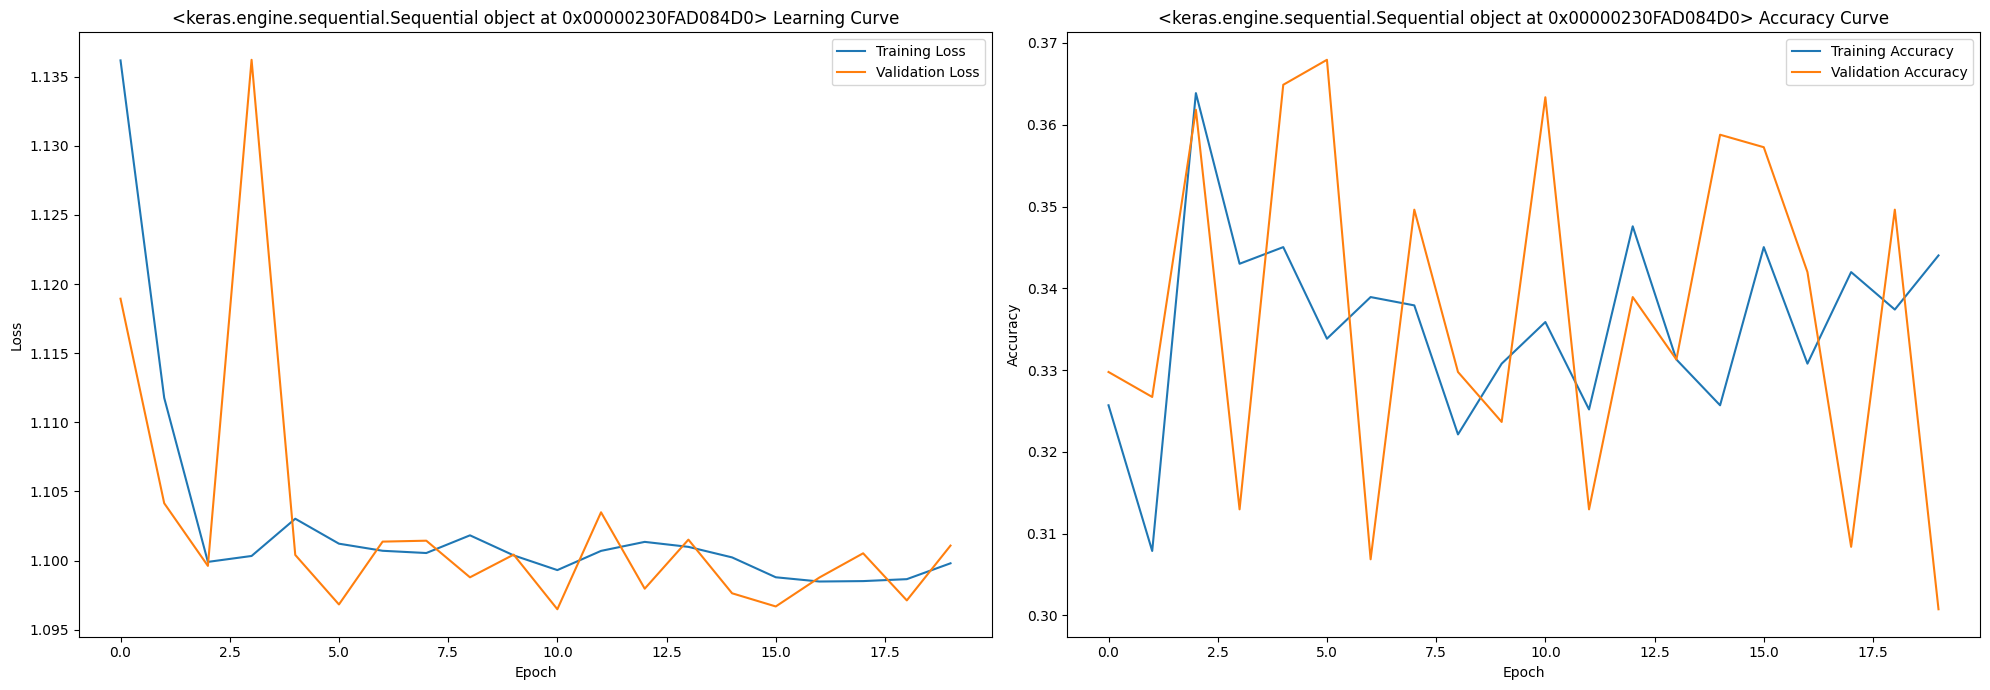

In [29]:
import matplotlib.pyplot as plt

def plot_learning_curves(history, model_name, ax):
    ax.plot(history.history['loss'], label='Training Loss')
    ax.plot(history.history['val_loss'], label='Validation Loss')
    ax.set_title(f'{model_name} Learning Curve')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')
    ax.legend()

def plot_accuracy_curves(history, model_name, ax):
    ax.plot(history.history['accuracy'], label='Training Accuracy')
    ax.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax.set_title(f'{model_name} Accuracy Curve')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Accuracy')
    ax.legend()

fig, axs = plt.subplots(1, 2, figsize=(20, 7))  
plot_learning_curves(history1, model1, axs[0])
plot_accuracy_curves(history1, model1, axs[1])

plt.tight_layout()
plt.show()

In [30]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)

In [31]:
X_pca_reduced = pca.fit_transform(X)

In [32]:
X_pca_reduced.shape

(3275, 26)

In [33]:
from sklearn.model_selection import train_test_split

X_train_full, X_test_pca, y_train_full, y_test_pca = train_test_split(X_pca_reduced, y, test_size=0.2, random_state=42)
X_train_pca, X_valid_pca, y_train_pca, y_valid_pca = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)

In [34]:
print("Training set shape : ",X_train_pca.shape)
print("Validation set shape : ",X_valid_pca.shape)
print("Testing set shape : ",X_test_pca.shape)

Training set shape :  (1965, 26)
Validation set shape :  (655, 26)
Testing set shape :  (655, 26)


In [35]:
tf.random.set_seed(42)
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Flatten())
for layer in range(10):
    model2.add(tf.keras.layers.Dense(100, activation="relu",
                                    kernel_initializer="he_normal"))
model2.add(tf.keras.layers.Dense(3, activation="softmax"))

In [36]:
model2.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              metrics=["accuracy"])

In [37]:
history2 = model2.fit(X_train_pca ,  y_train_pca, epochs=20,
                    validation_data=(X_valid_pca, y_valid_pca))

Epoch 1/20


62/62 [==============================] - 1s 3ms/step - loss: 1.1409 - accuracy: 0.3323 - val_loss: 1.1410 - val_accuracy: 0.3389
Epoch 2/20
62/62 [==============================] - 0s 1ms/step - loss: 1.1222 - accuracy: 0.3313 - val_loss: 1.1289 - val_accuracy: 0.3542
Epoch 3/20
62/62 [==============================] - 0s 2ms/step - loss: 1.1006 - accuracy: 0.3858 - val_loss: 1.1128 - val_accuracy: 0.3420
Epoch 4/20
62/62 [==============================] - 0s 2ms/step - loss: 1.0910 - accuracy: 0.3878 - val_loss: 1.1267 - val_accuracy: 0.3160
Epoch 5/20
62/62 [==============================] - 0s 2ms/step - loss: 1.0811 - accuracy: 0.4061 - val_loss: 1.1068 - val_accuracy: 0.3405
Epoch 6/20
62/62 [==============================] - 0s 2ms/step - loss: 1.0761 - accuracy: 0.4249 - val_loss: 1.1067 - val_accuracy: 0.3420
Epoch 7/20
62/62 [==============================] - 0s 2ms/step - loss: 1.0718 - accuracy: 0.4204 - val_loss: 1.1170 - val_accuracy: 0.3588
Epoch 8/20
62/62 [=============

In [38]:
score = model2.evaluate(X_test_pca, y_test_pca)
print('Test Accuracy : {:.4f} %'.format(score[1]*100))

21/21 [==============================] - 0s 1ms/step - loss: 1.2002 - accuracy: 0.3069
Test Accuracy : 30.6870 %


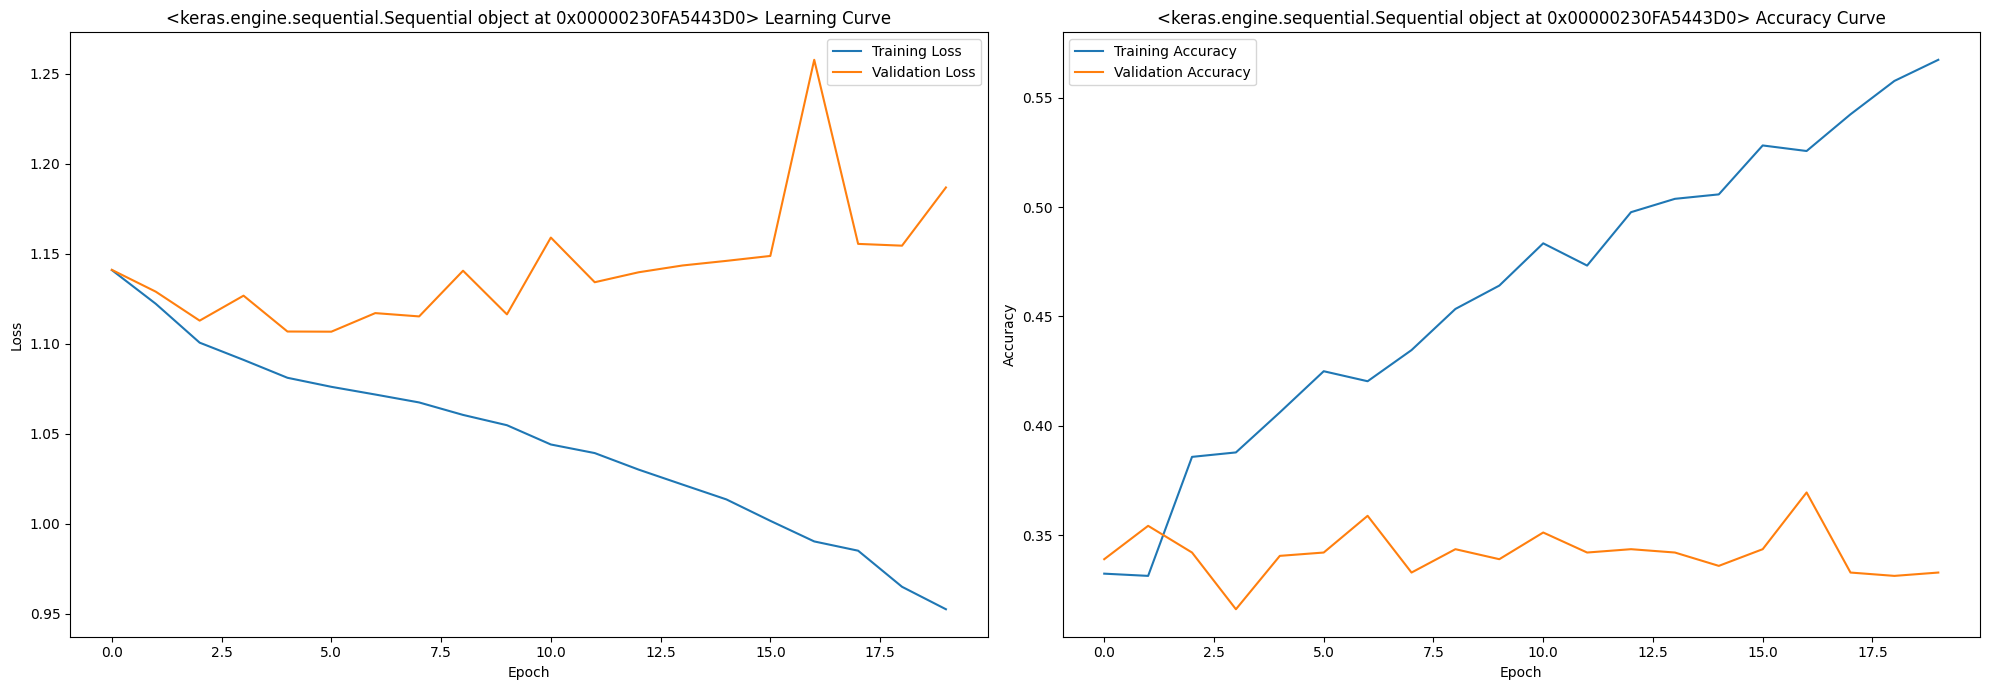

In [39]:
def plot_learning_curves(history, model_name, ax):
    ax.plot(history.history['loss'], label='Training Loss')
    ax.plot(history.history['val_loss'], label='Validation Loss')
    ax.set_title(f'{model_name} Learning Curve')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')
    ax.legend()

def plot_accuracy_curves(history, model_name, ax):
    ax.plot(history.history['accuracy'], label='Training Accuracy')
    ax.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax.set_title(f'{model_name} Accuracy Curve')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Accuracy')
    ax.legend()

fig, axs = plt.subplots(1, 2, figsize=(20, 7))  
plot_learning_curves(history2, model2, axs[0])
plot_accuracy_curves(history2, model2, axs[1])

plt.tight_layout()
plt.show()

In [40]:
tf.random.set_seed(42)
model3 = tf.keras.Sequential()
model3.add(tf.keras.layers.Flatten())
for layer in range(10):
    model3.add(tf.keras.layers.Dense(500, activation="relu",
                                    kernel_initializer="he_normal"))
model3.add(tf.keras.layers.Dense(3, activation="softmax"))

In [41]:
model3.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              metrics=["accuracy"])

In [42]:
history3 = model3.fit(X_train ,  y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
62/62 [==============================] - 1s 12ms/step - loss: 1.2272 - accuracy: 0.3130 - val_loss: 1.1941 - val_accuracy: 0.3298
Epoch 2/20
62/62 [==============================] - 1s 11ms/step - loss: 1.1151 - accuracy: 0.3170 - val_loss: 1.1016 - val_accuracy: 0.3359
Epoch 3/20
62/62 [==============================] - 1s 11ms/step - loss: 1.1015 - accuracy: 0.3542 - val_loss: 1.1073 - val_accuracy: 0.3221
Epoch 4/20
62/62 [==============================] - 1s 12ms/step - loss: 1.1036 - accuracy: 0.3410 - val_loss: 1.1476 - val_accuracy: 0.3130
Epoch 5/20
62/62 [==============================] - 1s 12ms/step - loss: 1.1028 - accuracy: 0.3588 - val_loss: 1.1039 - val_accuracy: 0.3069
Epoch 6/20
62/62 [==============================] - 1s 11ms/step - loss: 1.1034 - accuracy: 0.3308 - val_loss: 1.0985 - val_accuracy: 0.3527
Epoch 7/20
62/62 [==============================] - 1s 11ms/step - loss: 1.1022 - accuracy: 0.3593 - val_loss: 1.1037 - val_accuracy: 0.3252
Epoch 8/20
62

In [43]:
score = model3.evaluate(X_test, y_test)
print('Test Accuracy : {:.4f} %'.format(score[1]*100))

21/21 [==============================] - 0s 3ms/step - loss: 1.0992 - accuracy: 0.3237
Test Accuracy : 32.3664 %


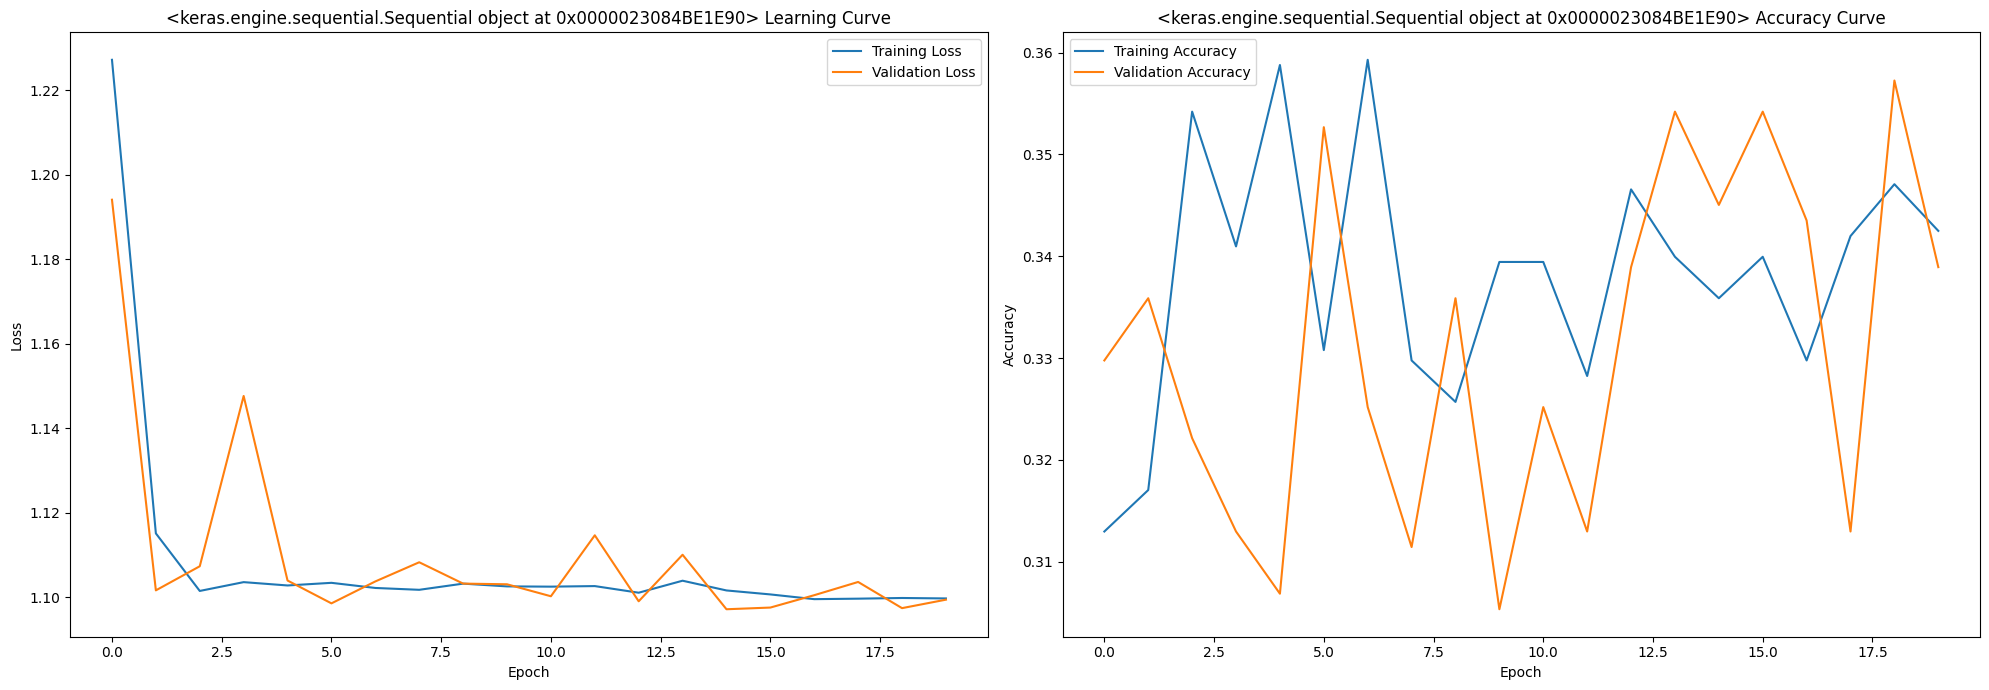

In [44]:
def plot_learning_curves(history, model_name, ax):
    ax.plot(history.history['loss'], label='Training Loss')
    ax.plot(history.history['val_loss'], label='Validation Loss')
    ax.set_title(f'{model_name} Learning Curve')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')
    ax.legend()

def plot_accuracy_curves(history, model_name, ax):
    ax.plot(history.history['accuracy'], label='Training Accuracy')
    ax.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax.set_title(f'{model_name} Accuracy Curve')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Accuracy')
    ax.legend()

fig, axs = plt.subplots(1, 2, figsize=(20, 7))  
plot_learning_curves(history3, model3, axs[0])
plot_accuracy_curves(history3, model3, axs[1])

plt.tight_layout()
plt.show()

In [45]:
tf.random.set_seed(42)
model4 = tf.keras.Sequential()
model4.add(tf.keras.layers.Flatten())
for layer in range(10):
    model4.add(tf.keras.layers.Dense(500, activation="relu",
                                    kernel_initializer="he_normal"))
model4.add(tf.keras.layers.Dense(3, activation="softmax"))

In [46]:
model4.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              metrics=["accuracy"])

In [47]:
history4 = model4.fit(X_train_pca ,  y_train_pca, epochs=20,
                    validation_data=(X_valid_pca, y_valid_pca))

Epoch 1/20
62/62 [==============================] - 1s 10ms/step - loss: 1.1765 - accuracy: 0.3211 - val_loss: 1.1556 - val_accuracy: 0.3313
Epoch 2/20
62/62 [==============================] - 1s 9ms/step - loss: 1.1113 - accuracy: 0.3868 - val_loss: 1.1150 - val_accuracy: 0.3649
Epoch 3/20
62/62 [==============================] - 1s 9ms/step - loss: 1.0593 - accuracy: 0.4636 - val_loss: 1.1233 - val_accuracy: 0.3176
Epoch 4/20
62/62 [==============================] - 1s 9ms/step - loss: 1.0237 - accuracy: 0.5232 - val_loss: 1.1868 - val_accuracy: 0.3130
Epoch 5/20
62/62 [==============================] - 1s 9ms/step - loss: 0.9888 - accuracy: 0.5684 - val_loss: 1.1307 - val_accuracy: 0.3496
Epoch 6/20
62/62 [==============================] - 1s 10ms/step - loss: 0.9581 - accuracy: 0.5776 - val_loss: 1.1325 - val_accuracy: 0.3603
Epoch 7/20
62/62 [==============================] - 1s 10ms/step - loss: 0.9216 - accuracy: 0.6275 - val_loss: 1.2671 - val_accuracy: 0.3191
Epoch 8/20
62/62 

In [48]:
score = model4.evaluate(X_test_pca, y_test_pca)
print('Test Accuracy : {:.4f} %'.format(score[1]*100))

21/21 [==============================] - 0s 3ms/step - loss: 2.3072 - accuracy: 0.3405
Test Accuracy : 34.0458 %


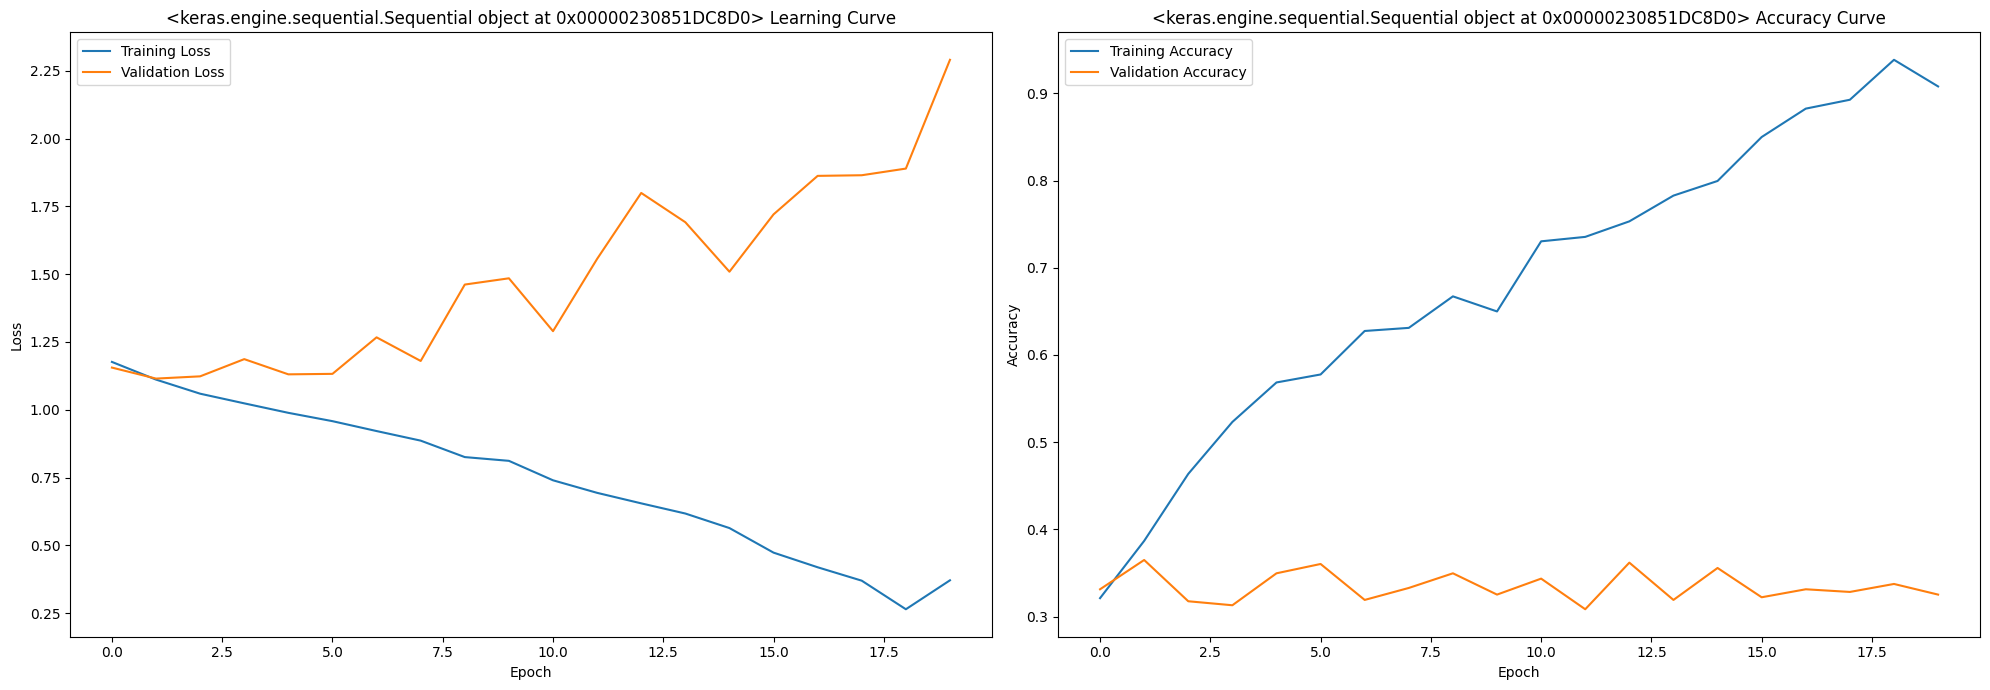

In [49]:
def plot_learning_curves(history, model_name, ax):
    ax.plot(history.history['loss'], label='Training Loss')
    ax.plot(history.history['val_loss'], label='Validation Loss')
    ax.set_title(f'{model_name} Learning Curve')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')
    ax.legend()

def plot_accuracy_curves(history, model_name, ax):
    ax.plot(history.history['accuracy'], label='Training Accuracy')
    ax.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax.set_title(f'{model_name} Accuracy Curve')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Accuracy')
    ax.legend()

fig, axs = plt.subplots(1, 2, figsize=(20, 7))  
plot_learning_curves(history4, model4, axs[0])
plot_accuracy_curves(history4, model4, axs[1])

plt.tight_layout()
plt.show()

In [50]:
leaky_relu = tf.keras.layers.LeakyReLU(alpha=0.2)

In [51]:
model5 = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(500, activation=leaky_relu,
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(500, activation=leaky_relu,
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(500, activation=leaky_relu,
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(500, activation=leaky_relu,
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(500, activation=leaky_relu,
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100, activation=leaky_relu,
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(3, activation="softmax")
])

In [52]:
model5.compile(loss="sparse_categorical_crossentropy",
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9 , beta_2=0.999),
              metrics=["accuracy"])

In [53]:
history5 = model5.fit(X_train_pca ,  y_train_pca, epochs=20,
                    validation_data=(X_valid_pca, y_valid_pca))

Epoch 1/20


62/62 [==============================] - 3s 11ms/step - loss: 1.5430 - accuracy: 0.3466 - val_loss: 1.2231 - val_accuracy: 0.3817
Epoch 2/20
62/62 [==============================] - 1s 9ms/step - loss: 1.3247 - accuracy: 0.3557 - val_loss: 1.1774 - val_accuracy: 0.3374
Epoch 3/20
62/62 [==============================] - 1s 10ms/step - loss: 1.2578 - accuracy: 0.3517 - val_loss: 1.1712 - val_accuracy: 0.3267
Epoch 4/20
62/62 [==============================] - 1s 10ms/step - loss: 1.1692 - accuracy: 0.3771 - val_loss: 1.1643 - val_accuracy: 0.3221
Epoch 5/20
62/62 [==============================] - 1s 9ms/step - loss: 1.1690 - accuracy: 0.3608 - val_loss: 1.1685 - val_accuracy: 0.3237
Epoch 6/20
62/62 [==============================] - 1s 9ms/step - loss: 1.1644 - accuracy: 0.3720 - val_loss: 1.1464 - val_accuracy: 0.3267
Epoch 7/20
62/62 [==============================] - 1s 9ms/step - loss: 1.1532 - accuracy: 0.3679 - val_loss: 1.1442 - val_accuracy: 0.3267
Epoch 8/20
62/62 [==========

In [54]:
score = model5.evaluate(X_test_pca, y_test_pca)
print('Test Accuracy : {:.4f} %'.format(score[1]*100))

21/21 [==============================] - 0s 2ms/step - loss: 1.1710 - accuracy: 0.3221
Test Accuracy : 32.2137 %


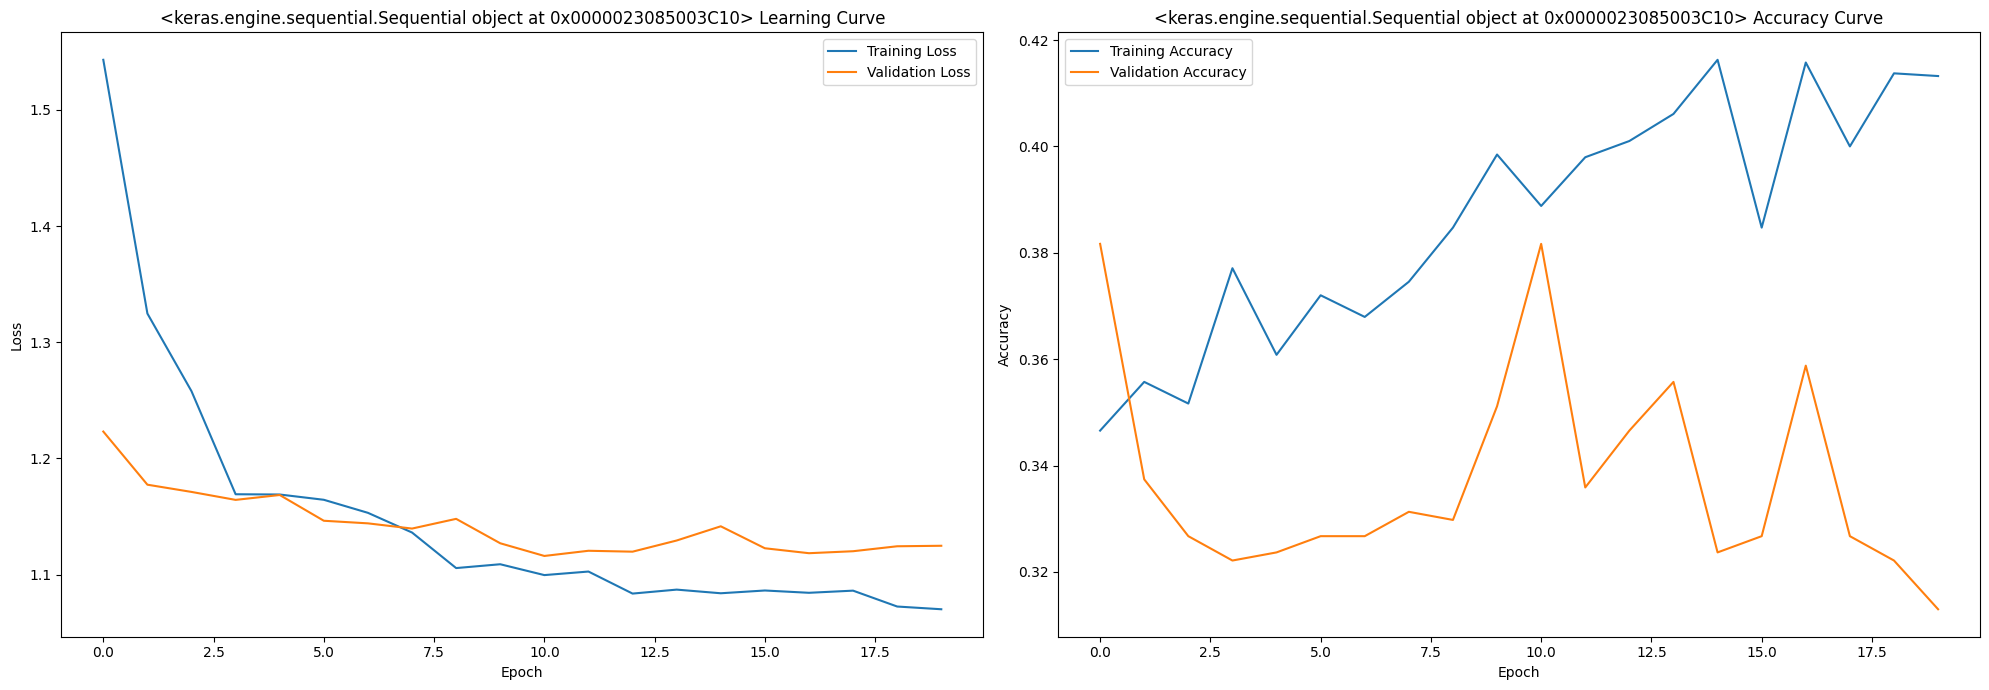

In [55]:
def plot_learning_curves(history, model_name, ax):
    ax.plot(history.history['loss'], label='Training Loss')
    ax.plot(history.history['val_loss'], label='Validation Loss')
    ax.set_title(f'{model_name} Learning Curve')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')
    ax.legend()

def plot_accuracy_curves(history, model_name, ax):
    ax.plot(history.history['accuracy'], label='Training Accuracy')
    ax.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax.set_title(f'{model_name} Accuracy Curve')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Accuracy')
    ax.legend()

fig, axs = plt.subplots(1, 2, figsize=(20, 7))  
plot_learning_curves(history5, model5, axs[0])
plot_accuracy_curves(history5, model5, axs[1])

plt.tight_layout()
plt.show()

In [56]:
model6 = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(300, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(300, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(300, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(300, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(3, activation="softmax")
])

In [57]:
model6.compile(loss="sparse_categorical_crossentropy",
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9 , beta_2=0.999),
              metrics=["accuracy"])

In [58]:
history6 = model6.fit(X_train_pca ,  y_train_pca, epochs=20,
                    validation_data=(X_valid_pca, y_valid_pca))

Epoch 1/20
62/62 [==============================] - 2s 7ms/step - loss: 1.5090 - accuracy: 0.3344 - val_loss: 1.1439 - val_accuracy: 0.3252
Epoch 2/20
62/62 [==============================] - 0s 5ms/step - loss: 1.3553 - accuracy: 0.3364 - val_loss: 1.1388 - val_accuracy: 0.3084
Epoch 3/20
62/62 [==============================] - 0s 5ms/step - loss: 1.2720 - accuracy: 0.3527 - val_loss: 1.1383 - val_accuracy: 0.3176
Epoch 4/20
62/62 [==============================] - 0s 5ms/step - loss: 1.2435 - accuracy: 0.3532 - val_loss: 1.1422 - val_accuracy: 0.3221
Epoch 5/20
62/62 [==============================] - 0s 6ms/step - loss: 1.1969 - accuracy: 0.3445 - val_loss: 1.1402 - val_accuracy: 0.3160
Epoch 6/20
62/62 [==============================] - 0s 4ms/step - loss: 1.1790 - accuracy: 0.3700 - val_loss: 1.1355 - val_accuracy: 0.3267
Epoch 7/20
62/62 [==============================] - 0s 4ms/step - loss: 1.1605 - accuracy: 0.3532 - val_loss: 1.1326 - val_accuracy: 0.3298
Epoch 8/20
62/62 [==

In [59]:
score = model6.evaluate(X_test_pca, y_test_pca)
print('Test Accuracy : {:.4f} %'.format(score[1]*100))

21/21 [==============================] - 0s 1ms/step - loss: 1.1322 - accuracy: 0.3466
Test Accuracy : 34.6565 %


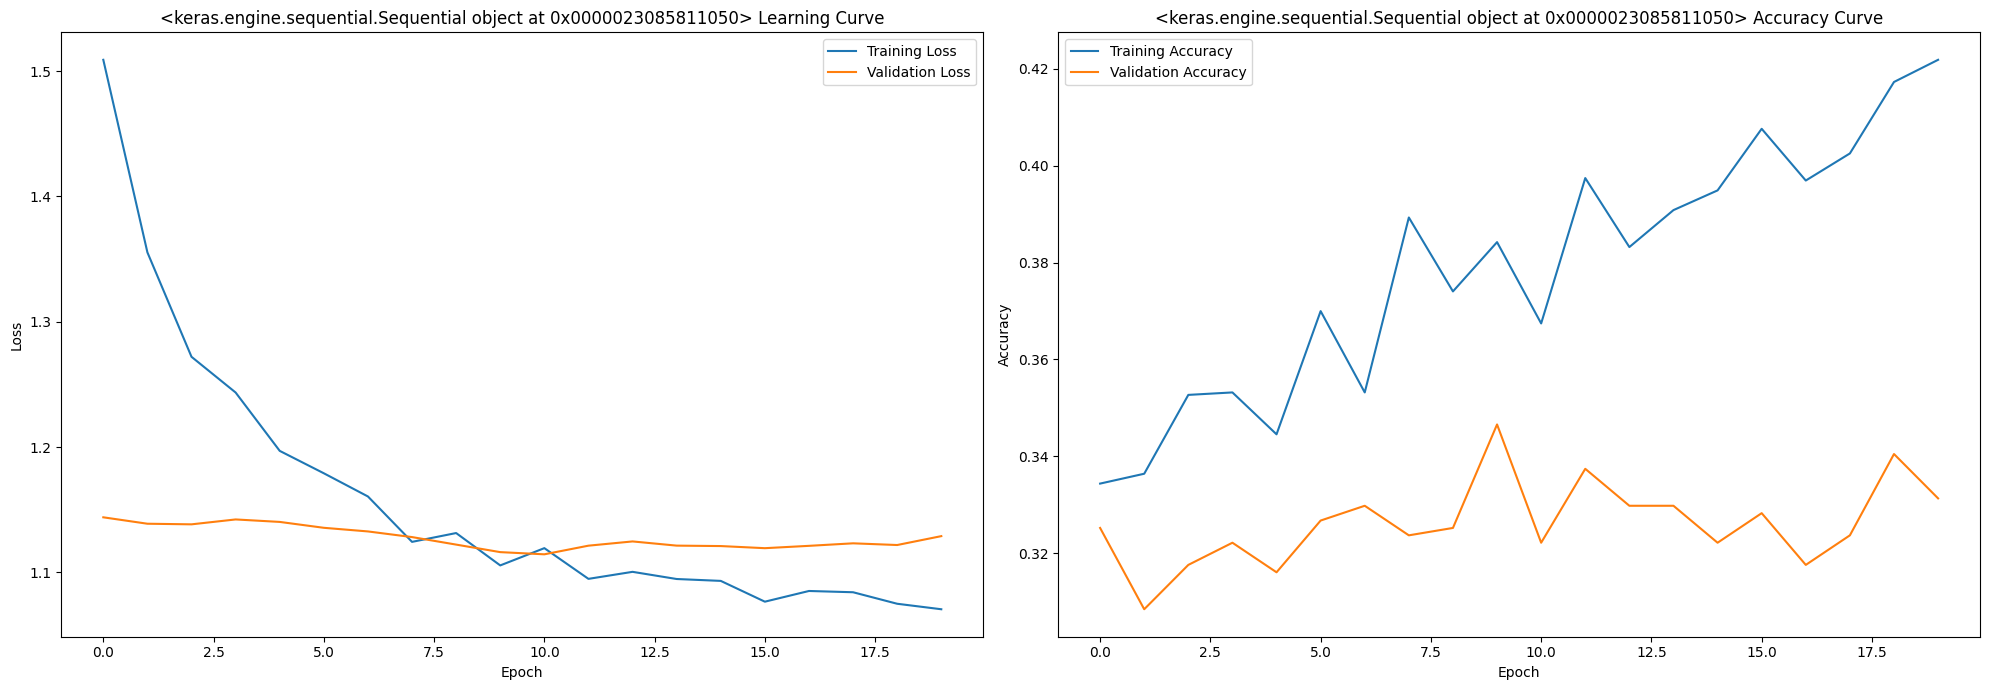

In [60]:
def plot_learning_curves(history, model_name, ax):
    ax.plot(history.history['loss'], label='Training Loss')
    ax.plot(history.history['val_loss'], label='Validation Loss')
    ax.set_title(f'{model_name} Learning Curve')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')
    ax.legend()

def plot_accuracy_curves(history, model_name, ax):
    ax.plot(history.history['accuracy'], label='Training Accuracy')
    ax.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax.set_title(f'{model_name} Accuracy Curve')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Accuracy')
    ax.legend()

fig, axs = plt.subplots(1, 2, figsize=(20, 7))  
plot_learning_curves(history6, model6, axs[0])
plot_accuracy_curves(history6, model6, axs[1])

plt.tight_layout()
plt.show()

In [61]:
model7 = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(2048, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(256, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(128, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(64, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(32, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(16, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(3, activation="softmax")
])

In [62]:
model7.compile(loss="sparse_categorical_crossentropy",
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"])

In [63]:
history7 = model7.fit(X_train_pca ,  y_train_pca, epochs=10,
                    validation_data=(X_valid_pca, y_valid_pca))

Epoch 1/10


62/62 [==============================] - 6s 68ms/step - loss: 1.9129 - accuracy: 0.3313 - val_loss: 1.0991 - val_accuracy: 0.3542
Epoch 2/10
62/62 [==============================] - 4s 70ms/step - loss: 1.3353 - accuracy: 0.3430 - val_loss: 1.1321 - val_accuracy: 0.3420
Epoch 3/10
62/62 [==============================] - 4s 65ms/step - loss: 1.1939 - accuracy: 0.3262 - val_loss: 1.1122 - val_accuracy: 0.3328
Epoch 4/10
62/62 [==============================] - 4s 70ms/step - loss: 1.1779 - accuracy: 0.3298 - val_loss: 1.1090 - val_accuracy: 0.3160
Epoch 5/10
62/62 [==============================] - 4s 64ms/step - loss: 1.1525 - accuracy: 0.3338 - val_loss: 1.0972 - val_accuracy: 0.3328
Epoch 6/10
62/62 [==============================] - 4s 64ms/step - loss: 1.1316 - accuracy: 0.3333 - val_loss: 1.0995 - val_accuracy: 0.3374
Epoch 7/10
62/62 [==============================] - 4s 68ms/step - loss: 1.1269 - accuracy: 0.3354 - val_loss: 1.0993 - val_accuracy: 0.3740
Epoch 8/10
62/62 [======

In [64]:
score = model7.evaluate(X_test_pca, y_test_pca)
print('Test Accuracy : {:.4f} %'.format(score[1]*100))

21/21 [==============================] - 0s 6ms/step - loss: 1.1000 - accuracy: 0.3023
Test Accuracy : 30.2290 %


In [65]:
model8 = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation="elu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(2048, activation="elu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation="elu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation="elu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(256, activation="elu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(128, activation="elu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(64, activation="elu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(32, activation="elu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(16, activation="elu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(3, activation="softmax")
])

In [66]:
model8.compile(loss="sparse_categorical_crossentropy",
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["accuracy"])

In [67]:
history8 = model8.fit(X_train_pca ,  y_train_pca, epochs=10,
                    validation_data=(X_valid_pca, y_valid_pca))

Epoch 1/10
62/62 [==============================] - 5s 68ms/step - loss: 14.6741 - accuracy: 0.3537 - val_loss: 1.1005 - val_accuracy: 0.3573
Epoch 2/10
62/62 [==============================] - 4s 62ms/step - loss: 1.4112 - accuracy: 0.3384 - val_loss: 1.0982 - val_accuracy: 0.3298
Epoch 3/10
62/62 [==============================] - 4s 63ms/step - loss: 1.1899 - accuracy: 0.3359 - val_loss: 1.0989 - val_accuracy: 0.3298
Epoch 4/10
62/62 [==============================] - 4s 63ms/step - loss: 1.1815 - accuracy: 0.3298 - val_loss: 1.1034 - val_accuracy: 0.3130
Epoch 5/10
62/62 [==============================] - 4s 60ms/step - loss: 1.1451 - accuracy: 0.3323 - val_loss: 1.1006 - val_accuracy: 0.3573
Epoch 6/10
62/62 [==============================] - 4s 61ms/step - loss: 1.1706 - accuracy: 0.3461 - val_loss: 1.0976 - val_accuracy: 0.3573
Epoch 7/10
62/62 [==============================] - 4s 61ms/step - loss: 1.2863 - accuracy: 0.3094 - val_loss: 1.1013 - val_accuracy: 0.3130
Epoch 8/10
6

In [68]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation="elu", kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2048, activation="elu", kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1024, activation="elu", kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation="elu", kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation="elu", kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation="elu", kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation="elu", kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation="elu", kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(16, activation="elu", kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation="softmax")
])

# Learning rate scheduling
initial_learning_rate = 0.01
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=10000, decay_rate=0.9)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=optimizer,
    metrics=["accuracy"]
)



In [69]:
history = model.fit(X_train_pca ,  y_train_pca, epochs=50,
                    validation_data=(X_valid_pca, y_valid_pca))

Epoch 1/50
62/62 [==============================] - 7s 71ms/step - loss: 1.3728 - accuracy: 0.3155 - val_loss: 1.4529 - val_accuracy: 0.3740
Epoch 2/50
62/62 [==============================] - 4s 70ms/step - loss: 1.1157 - accuracy: 0.3364 - val_loss: 1.1006 - val_accuracy: 0.3282
Epoch 3/50
62/62 [==============================] - 4s 66ms/step - loss: 1.1078 - accuracy: 0.3303 - val_loss: 1.1024 - val_accuracy: 0.3008
Epoch 4/50
62/62 [==============================] - 4s 69ms/step - loss: 1.1049 - accuracy: 0.3547 - val_loss: 1.1103 - val_accuracy: 0.3038
Epoch 5/50
62/62 [==============================] - 4s 65ms/step - loss: 1.1088 - accuracy: 0.3099 - val_loss: 1.0990 - val_accuracy: 0.3282
Epoch 6/50
62/62 [==============================] - 4s 65ms/step - loss: 1.1019 - accuracy: 0.3338 - val_loss: 1.1002 - val_accuracy: 0.3053
Epoch 7/50
62/62 [==============================] - 4s 65ms/step - loss: 1.1103 - accuracy: 0.3226 - val_loss: 1.1011 - val_accuracy: 0.3084
Epoch 8/50
62

In [70]:
score = model.evaluate(X_test_pca, y_test_pca)
print('Test Accuracy : {:.4f} %'.format(score[1]*100))

21/21 [==============================] - 0s 11ms/step - loss: 1.1496 - accuracy: 0.3405
Test Accuracy : 34.0458 %


In [72]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(2048, return_sequences=True, input_shape=[None, 1]),
    tf.keras.layers.SimpleRNN(1024),
    tf.keras.layers.Dense(3 , activation="softmax")
])

initial_learning_rate = 0.01
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=10000, decay_rate=0.9)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=optimizer,
    metrics=["accuracy"]
)
history = model.fit(X_train_pca ,  y_train_pca, epochs=5,
                    validation_data=(X_valid_pca, y_valid_pca))

Epoch 1/5
62/62 [==============================] - 25s 387ms/step - loss: 2.1292 - accuracy: 0.3435 - val_loss: 1.6188 - val_accuracy: 0.3298
Epoch 2/5
62/62 [==============================] - 24s 385ms/step - loss: 1.5402 - accuracy: 0.3461 - val_loss: 2.6376 - val_accuracy: 0.3298
Epoch 3/5
62/62 [==============================] - 23s 379ms/step - loss: 1.6779 - accuracy: 0.3450 - val_loss: 1.6996 - val_accuracy: 0.3023
Epoch 4/5
62/62 [==============================] - 23s 378ms/step - loss: 1.5291 - accuracy: 0.3338 - val_loss: 1.4153 - val_accuracy: 0.3023
Epoch 5/5
62/62 [==============================] - 23s 377ms/step - loss: 1.6134 - accuracy: 0.3445 - val_loss: 1.3991 - val_accuracy: 0.3573


In [73]:
score = model.evaluate(X_test_pca, y_test_pca)
print('Test Accuracy : {:.4f} %'.format(score[1]*100))

21/21 [==============================] - 2s 87ms/step - loss: 1.3986 - accuracy: 0.3328
Test Accuracy : 33.2824 %


In [74]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(2048, return_sequences=True, input_shape=[None, 1]),
    tf.keras.layers.LSTM(1024),
    tf.keras.layers.Dense(3 , activation="softmax")
])

initial_learning_rate = 0.01
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=10000, decay_rate=0.9)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=optimizer,
    metrics=["accuracy"]
)
history = model.fit(X_train_pca ,  y_train_pca, epochs=10,
                    validation_data=(X_valid_pca, y_valid_pca))

Epoch 1/10
43/62 [===================>..........] - ETA: 29s - loss: 1.5770 - accuracy: 0.3110

KeyboardInterrupt: 